## Computer Exercise \#5 ##

 Most of the code needed for this exercise is included below.  However, there are some choices that need to be made in how some of the calls to classes are done, and some expansion of the code is necessary.  For example, you are given the basic code for creating pair-plots, but you may want to make more than one.

### Common Imports ###

In [1]:
#Common imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

### Read Dataset ###

In [2]:
diabetesDF = pd.read_csv('../datasets/diabetes.csv')
print(diabetesDF.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Splitting the data set ###

In [4]:
N1 = 600 #Put in a value here
DF_train = diabetesDF[:N1]
DF_test = diabetesDF[N1:]

### Extract feature vectors and target outputs into two numpy arrays ###

In [5]:
X_train = np.asarray(DF_train.drop(labels='Outcome',axis=1))
y_train = np.asarray(DF_train['Outcome'])
X_test = np.asarray(DF_test.drop(labels='Outcome',axis=1))
y_test = np.asarray(DF_test['Outcome'])

### Data Scaling ###

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Two different scalers. Decide which one to use
#     Minmax or Standard
scaler=MinMaxScaler()
scaler=StandardScaler()

### Scaling the training set

In [7]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

Box plot of the unscaled training set.

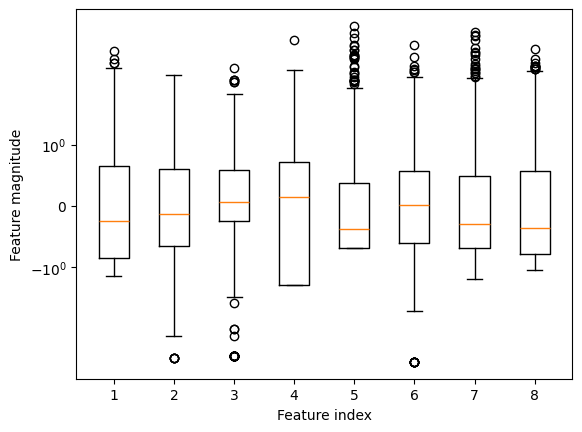

In [8]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.show()

## Data Exploration ##

In [9]:
corr = diabetesDF.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

<Axes: >

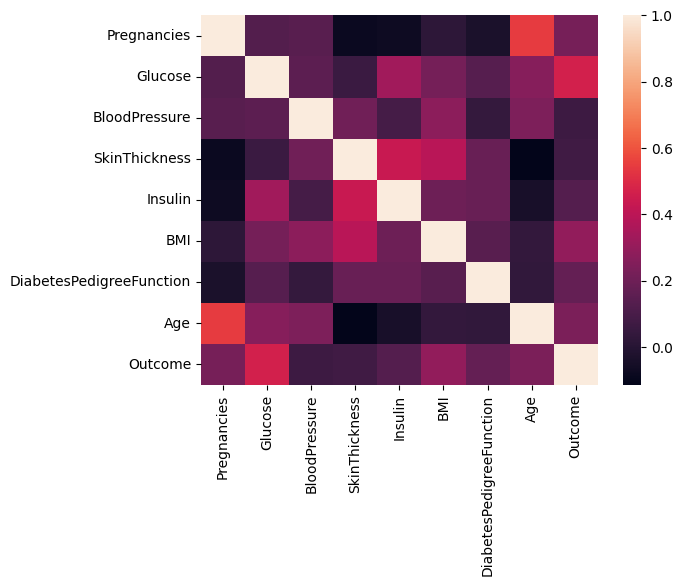

In [10]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

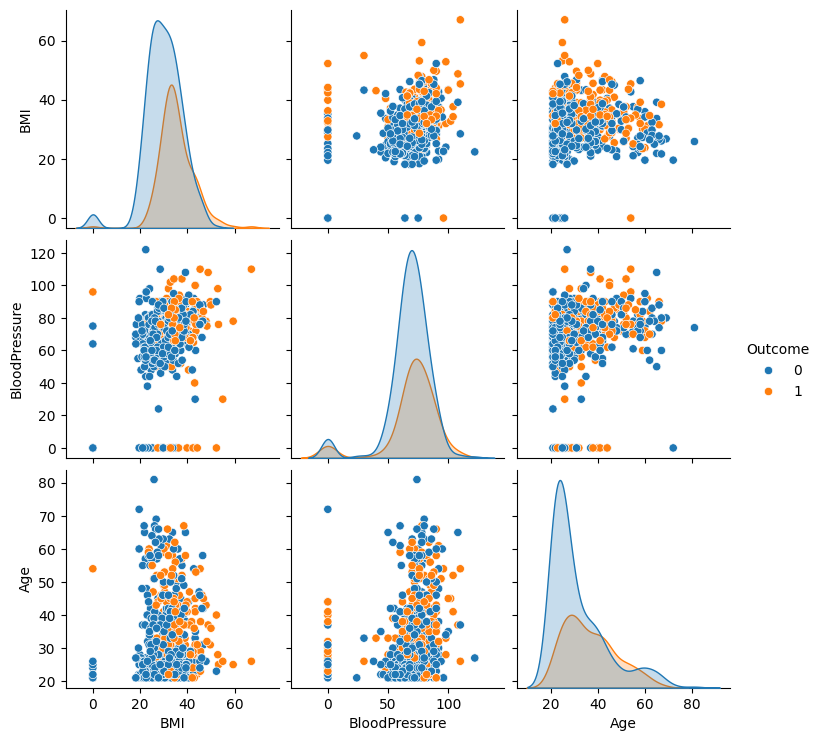

In [11]:
sns.pairplot(DF_train, vars=['BMI', 'BloodPressure', 'Age'], hue='Outcome')
plt.show()  

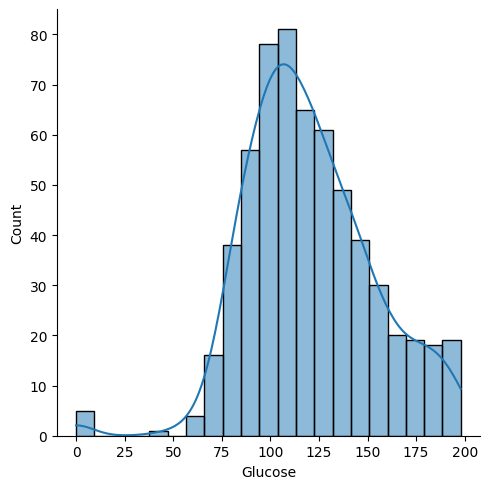

In [12]:
sns.displot(DF_train['Glucose'].dropna(),kde=True)

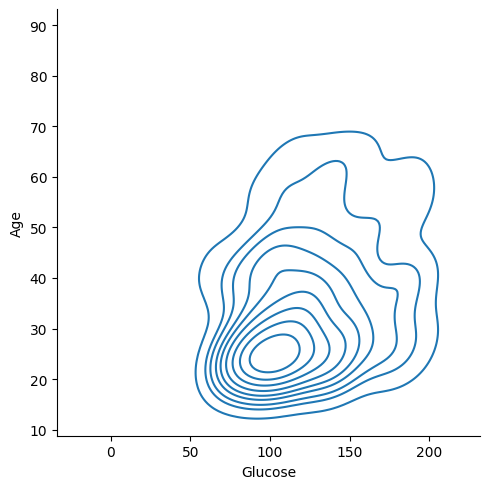

In [13]:
sns.displot(data=DF_train, x='Glucose',y='Age',kind='kde')

## Logistic Regression ##

In [14]:
clf=LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_test_pred = clf.predict(X_test)

In [16]:
y_test_prob = clf.predict_proba(X_test)

In [17]:
print(y_test_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [18]:
accuracy = clf.score(X_test,y_test)
accuracy
print("accuracy = ", accuracy * 100, "%")

accuracy =  35.714285714285715 %


## Performance:  Accuracy, Confusion Matrix, Precision and Recall ##

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[  0, 108],
       [  0,  60]])

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_test, y_test_pred)
recall_score(y_test, y_test_pred) 

np.float64(1.0)

In [21]:
f1_score(y_test,y_test_pred)

np.float64(0.5263157894736842)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.36      1.00      0.53        60

    accuracy                           0.36       168
   macro avg       0.18      0.50      0.26       168
weighted avg       0.13      0.36      0.19       168



/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/schuler/Documents/Learn/GMU/gmu-ece-527/env_39/lib64/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

### ROC ###

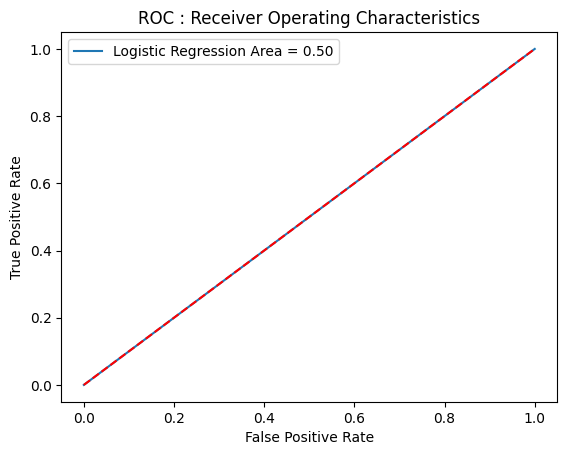

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve
roc_score = roc_auc_score(y_test,clf.predict(X_test))
fpr, tpr, thr = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='Logistic Regression Area = {:.2f}'.format(roc_score))
plt.plot([0,1],[0,1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC : Receiver Operating Characteristics')
plt.legend()
plt.show()

### Feature Importance ###

In [29]:
coeff = list(clf.coef_[0])
labels = list(DF_train.drop(labels='Outcome',axis=1).columns)

array([0, 1])

Text(0.5, 0, 'Importance')

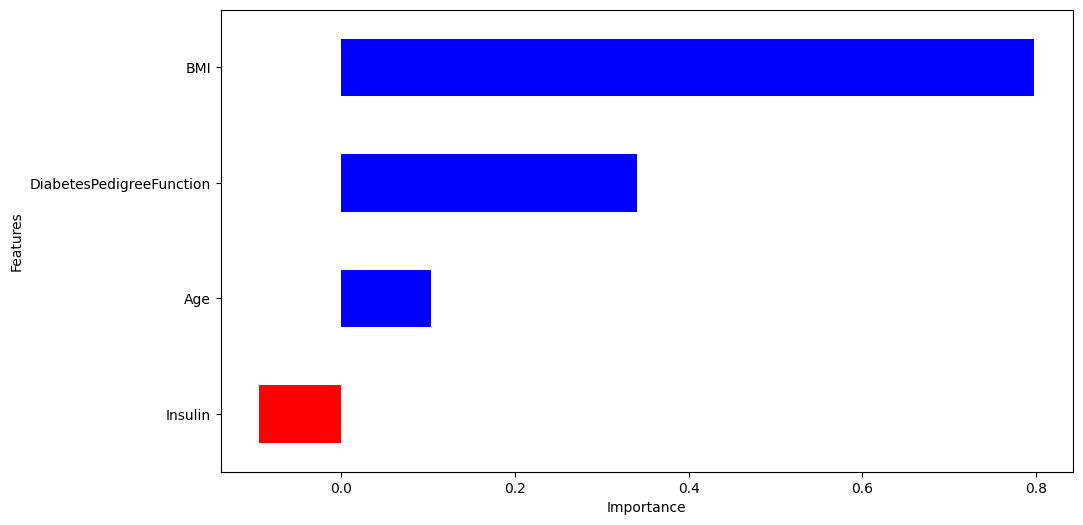

In [25]:
features = pd.DataFrame()
features['Features'] = labels[4:8]
features['importance'] = coeff[4:8]
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [26]:
array1 = np.asarray(diabetesDF.iloc[:,1:2])
label1 = np.asarray(diabetesDF['Outcome'])
LR1 = LogisticRegression()
LR1.fit(array1, label1)

LogisticRegression()

Text(0.5, 1.0, 'Predicting Diabetes from Glucose Level')

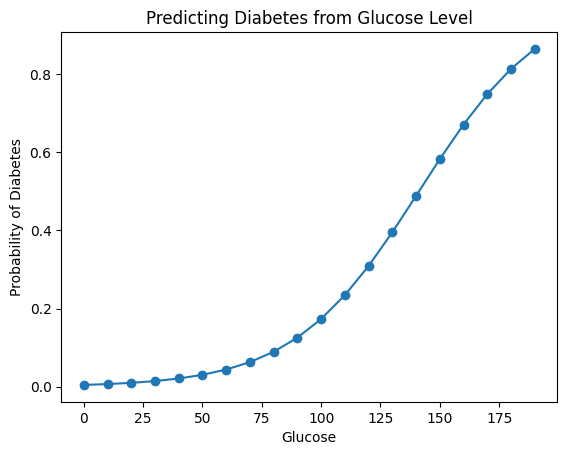

In [27]:
x=np.arange(0,200,10).reshape(-1,1)
y=LR1.predict_proba(x)
plt.scatter(x,y[:,1])
plt.plot(x,y[:,1])
plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes')
plt.title('Predicting Diabetes from Glucose Level') 